## 데이터 셋 확인

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
import numpy as np
warnings.filterwarnings(action='ignore')

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

In [2]:
from matplotlib import font_manager, rc
import matplotlib
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
train = pd.read_csv("../input/Credit-card-user-overdue/train.csv", index_col=0)
test = pd.read_csv("../input/Credit-card-user-overdue/test.csv", index_col=0)

train.shape
train.head()

(26457, 19)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [5]:
train.isna().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [6]:
test.isna().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [7]:
#pandas출력 옵션설정 - float형식으로 수치표기  
pd.set_option('display.float_format', '{:.2f}'.format)
train.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00
mean,0.43,187306.52,-15958.05,59068.75,1.00,0.22,0.29,0.09,2.20,-26.12,1.52
std,0.75,101878.37,4201.59,137475.43,0.00,0.42,0.46,0.29,0.92,16.56,0.70
min,0.00,27000.00,-25152.00,-15713.00,1.00,0.00,0.00,0.00,1.00,-60.00,0.00
25%,0.00,121500.00,-19431.00,-3153.00,1.00,0.00,0.00,0.00,2.00,-39.00,1.00
50%,0.00,157500.00,-15547.00,-1539.00,1.00,0.00,0.00,0.00,2.00,-24.00,2.00
75%,1.00,225000.00,-12446.00,-407.00,1.00,0.00,1.00,0.00,3.00,-12.00,2.00
max,19.00,1575000.00,-7705.00,365243.00,1.00,1.00,1.00,1.00,20.00,0.00,2.00


In [8]:
train.groupby('occyp_type')['credit'].mean()

occyp_type
Accountants             1.49
Cleaning staff          1.57
Cooking staff           1.51
Core staff              1.50
Drivers                 1.54
HR staff                1.71
High skill tech staff   1.50
IT staff                1.37
Laborers                1.50
Low-skill Laborers      1.49
Managers                1.53
Medicine staff          1.59
Private service staff   1.49
Realty agents           1.54
Sales staff             1.51
Secretaries             1.49
Security staff          1.61
Waiters/barmen staff    1.44
Name: credit, dtype: float64

결측치를 채우는 방향으로 가면 좋을 듯.

## 데이터 시각화

### 성별 데이터

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='count'>

Text(0.5, 1.0, '성별 분포: 신용도')

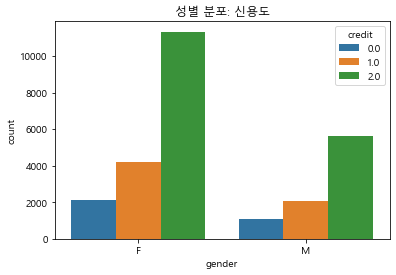

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot('gender',hue='credit', data=train)
plt.title('성별 분포: 신용도')
plt.show()

### 나이 데이터

출생일 데이터는 데이터 수집 당시부터 역으로 계산한다는데, 데이터 수집 당시가 언제지??  
아 그때 당시 나이니까 365를 나눠서 절대값 씌우면 됩니다.

In [10]:
train['age'] = abs(train['DAYS_BIRTH'] / 365).astype(int)
test['age'] = abs(test['DAYS_BIRTH'] / 365).astype(int)

In [11]:
print('가장 고령의 사용자: {} years'.format(train['age'].max()))
print('가장 어린 사용자: {} years'.format(train['age'].min()))
print('사용자 평균 나이: {:.1f} years'.format(train['age'].mean()))

가장 고령의 사용자: 68 years
가장 어린 사용자: 21 years
사용자 평균 나이: 43.2 years


<AxesSubplot:xlabel='age', ylabel='Density'>

<AxesSubplot:xlabel='age', ylabel='Density'>

<AxesSubplot:xlabel='age', ylabel='Density'>

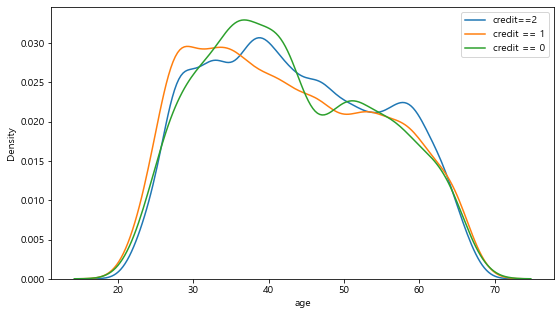

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train['credit'] == 2.0]['age'], ax=ax)
sns.kdeplot(train[train['credit'] == 1.0]['age'], ax=ax)
sns.kdeplot(train[train['credit'] == 0.0]['age'], ax=ax)
plt.legend(['credit==2', 'credit == 1', 'credit == 0'])
plt.show()

그래프를 보면 신용등급 1의 경우 20-30대에 몰려 있고, 신용등급 0의 경우 35-40대에 머물러 있다

### 차량 소유 여부

In [13]:
train['car'].unique()

array(['N', 'Y'], dtype=object)

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='credit', ylabel='count'>

Text(0.5, 1.0, '신용도: 차량 소유 여부')

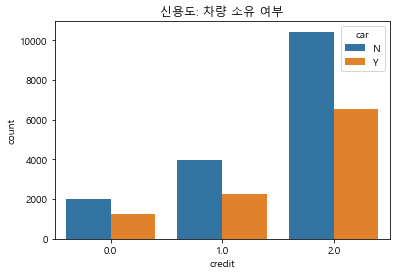

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot('credit',hue='car', data=train)
plt.title('신용도: 차량 소유 여부')
plt.show()

대체로 차량 소유 여부 비율이 비슷해보인다.

### 부동산 소유 여부

In [15]:
train['reality'].unique()

array(['N', 'Y'], dtype=object)

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='credit', ylabel='count'>

Text(0.5, 1.0, '신용도: 부동산 소유 여부')

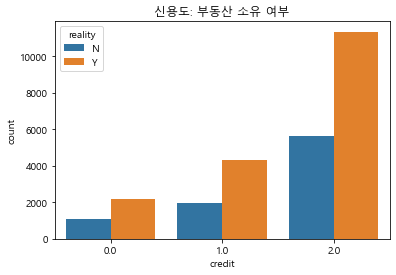

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot('credit',hue='reality', data=train)
plt.title('신용도: 부동산 소유 여부')
plt.show()

대체로 부동산 소유 여부 비율이 비슷해보인다.

### 자녀 수

In [17]:
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

자녀가 7명 이상은 좀 이상한데???  
7이상은 5명 이상으로 처리하자

In [18]:
train.loc[train.child_num > 5, 'child_num'] = 5

<AxesSubplot:xlabel='child_num', ylabel='count'>

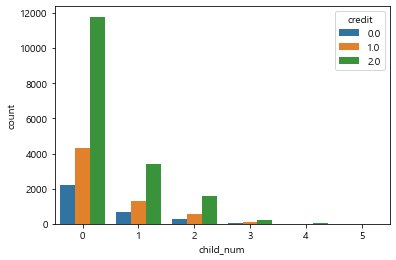

In [19]:
sns.countplot('child_num', hue='credit', data=train)

자녀수에 따라 신용도 차이가 크게 없어보인다.

### 연간 소득

In [20]:
train.income_total

index
0       202500.00
1       247500.00
2       450000.00
3       202500.00
4       157500.00
           ...   
26452   225000.00
26453   180000.00
26454   292500.00
26455   171000.00
26456    81000.00
Name: income_total, Length: 26457, dtype: float64

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='income_total', ylabel='Density'>

Text(0.5, 1.0, '연간 소득')

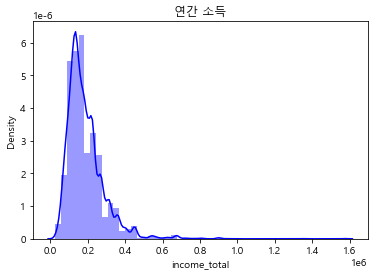

In [21]:
plt.figure(figsize=(6, 4))
sns.distplot(train.income_total, color='b')
plt.title('연간 소득')
plt.show()

그래프가 한쪽으로 쏠리는 현상이 나타났습니다.  
log변환을 사용해서 비대칭성을 없애주겠습니다. 

In [22]:
train["income_total_log"] = np.log1p(train["income_total"])
test["income_total_log"] = np.log1p(test["income_total"])

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='income_total_log', ylabel='Density'>

Text(0.5, 1.0, '연간 소득: log 변환')

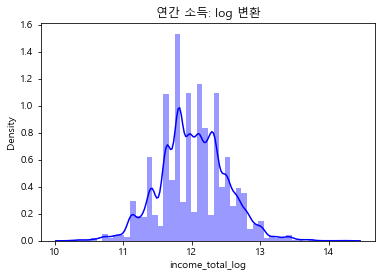

In [23]:
plt.figure(figsize=(6, 4))
sns.distplot(train.income_total_log, color='b')
plt.title('연간 소득: log 변환')
plt.show()

소득분류를 log화 하는 경우는 좀더 깊이 고민해야 할 필요가 있다. 소득은 자체는 상당히 절대적인 지표이다. 특히 저소득자들에게서 소득의 의미가 큰데 log변환을 하면서 바뀌는 의미를 고려해봐야겠다.  
그래서 저소득자와 고소득자의 연체율 차이를 한번 짚고 넘어가보겠다.

In [24]:
train["income_total"].describe()

count     26457.00
mean     187306.52
std      101878.37
min       27000.00
25%      121500.00
50%      157500.00
75%      225000.00
max     1575000.00
Name: income_total, dtype: float64

우선 상위 50% 하위 50%로 나누어서 분석해보겠다.

<AxesSubplot:xlabel='credit', ylabel='Density'>

<AxesSubplot:xlabel='credit', ylabel='Density'>

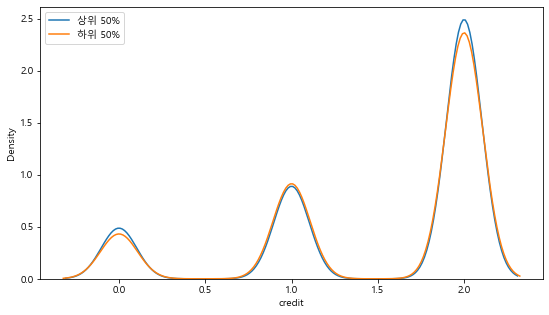

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train['income_total'] >= 157500.00]['credit'], ax=ax)
sns.kdeplot(train[train['income_total'] < 157500.00]['credit'], ax=ax)
plt.legend(['상위 50%', '하위 50%'])
plt.show()

거의 비슷해 보이는데 상위 50%에서 신용등급이 2일 경우가 더 많았다.  
이번에는 상위 25% 하위 25%로 나누어 보겠다.

<AxesSubplot:xlabel='credit', ylabel='Density'>

<AxesSubplot:xlabel='credit', ylabel='Density'>

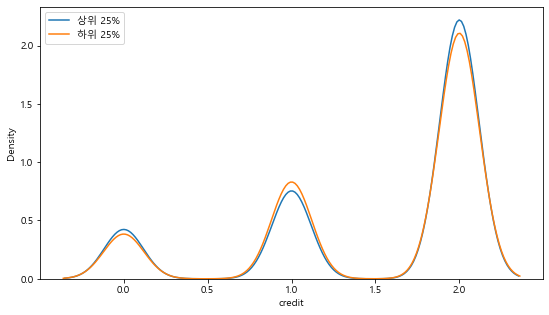

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train['income_total'] >= 225000.00]['credit'], ax=ax)
sns.kdeplot(train[train['income_total'] < 121500.00]['credit'], ax=ax)
plt.legend(['상위 25%', '하위 25%'])
plt.show()

더욱 극명하게 갈리는 것 같다. 상위 25%의 경우 0등급과 2등급은 더 많지만, 반대로 등급1의 경우에는 더 적다.  
이는 무엇을 의미할까?

### 소득 분류

In [27]:
train.income_type.value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

Working : 직장  
Commercial associate : 상업 관계자  
Pensioner : 연금 수급자  
State servant : 공무원  
Student : 학생  

소득 분류는 어떻게 해석하면 좋을까??

In [28]:
train.loc[train.income_type=='Student']['age']

index
2990     51
3602     51
6223     24
8936     51
11646    33
21681    51
23119    33
Name: age, dtype: int32

Student는 뭐지?? 나이가 50대가 많네

### 교육수준

In [29]:
train.edu_type.value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

### 결혼 여부

In [29]:
train.family_type.value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

### 생활 방식

In [30]:
train.house_type.value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

### 업무 시작일

In [31]:
train.DAYS_EMPLOYED.value_counts()

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-10475        1
-2202         1
-2552         1
-680          1
-4973         1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Count'>

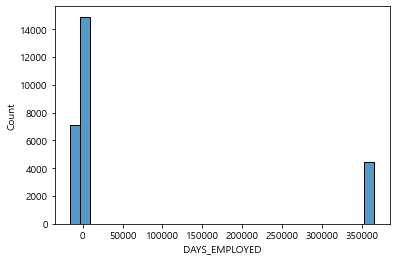

In [32]:
sns.histplot(train.DAYS_EMPLOYED, bins=30)

365243 값의 경우 아직 일을 시작하지 않은 이상치 값일 것이다.  
이를 추가 분석하기 위해서 365243 값들 중에서 직업 유형의 결측값을 분석해 볼 것이다.

In [46]:
len(train.loc[train.DAYS_EMPLOYED == 365243]['occyp_type'])
train.loc[train.DAYS_EMPLOYED == 365243]['occyp_type'].isna().sum()


4438

4438

index
14       NaN
18       NaN
21       NaN
24       NaN
46       NaN
        ... 
26431    NaN
26432    NaN
26439    NaN
26441    NaN
26443    NaN
Name: occyp_type, Length: 4438, dtype: object

In [60]:
df_NoJop = train.loc[train.DAYS_EMPLOYED == 365243].copy()
df_NoJop.loc[train.income_type !='Pensioner']

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age,income_total_log
index,,,,,,,,,,,,,,,,,,,,,


<AxesSubplot:xlabel='income_type', ylabel='count'>

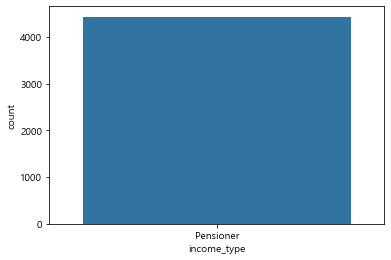

In [64]:
sns.countplot(df_NoJop.income_type)

In [58]:
NoJop_index.apply(lambda x: x in Pensioner_index)

AttributeError: 'Int64Index' object has no attribute 'apply'

### 핸드폰 소유 여부

In [32]:
train.FLAG_MOBIL.value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

얘는 꼭 지우자!!

###  업무용 전화 소유 여부

In [33]:
train.work_phone.value_counts()

0    20511
1     5946
Name: work_phone, dtype: int64

### 전화 소유 여부

In [34]:
train.phone.value_counts()

0    18672
1     7785
Name: phone, dtype: int64

### 이메일 소유 여부


In [35]:
train.email.value_counts()

0    24042
1     2415
Name: email, dtype: int64

### 직업 유형	

In [36]:
train.occyp_type.value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

<AxesSubplot:xlabel='occyp_type', ylabel='count'>

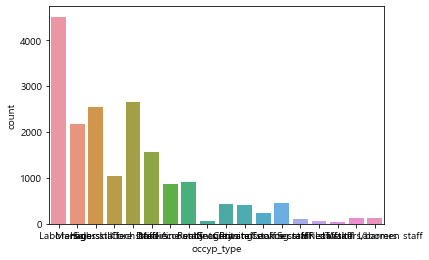

In [29]:
sns.countplot(train.occyp_type)

### 가족 규모

In [37]:
train.family_size.value_counts()

2.00     14106
1.00      5109
3.00      4632
4.00      2260
5.00       291
6.00        44
7.00         9
15.00        3
9.00         2
20.00        1
Name: family_size, dtype: int64

### 신용카드 발급 월

In [38]:
train.begin_month.value_counts()

-7.00     662
-11.00    617
-8.00     612
-3.00     593
-6.00     591
         ... 
-58.00    244
-59.00    242
-60.00    235
0.00      231
-57.00    228
Name: begin_month, Length: 61, dtype: int64